In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.metrics import f1_score, accuracy_score
from sklearn import model_selection, naive_bayes
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [183]:
df0=pd.read_csv('C:\\Users\\fathi\\Desktop\\p2m-model\\sentiment_analysis\\datasets\\BR2.csv')
df6=pd.read_csv('C:\\Users\\fathi\\Desktop\\p2m-model\\sentiment_analysis\\datasets\\books2.csv')

In [184]:
df = pd.merge(df0,df6, on = 'Title')

In [185]:
df['authors'] = df['authors'].str.extract(r'\'(.*)\'')
df['categories'] = df['categories'].str.extract(r'\'(.*)\'')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346326 entries, 0 to 346325
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               346325 non-null  object 
 1   description         299324 non-null  object 
 2   authors             334188 non-null  object 
 3   image               312137 non-null  object 
 4   previewLink         344437 non-null  object 
 5   publisher           277145 non-null  object 
 6   publishedDate       342052 non-null  object 
 7   infoLink            344437 non-null  object 
 8   categories          311410 non-null  object 
 9   ratingsCount        191019 non-null  float64
 10  Id                  346326 non-null  object 
 11  Price               58318 non-null   float64
 12  User_id             278171 non-null  object 
 13  profileName         278161 non-null  object 
 14  review/helpfulness  346326 non-null  object 
 15  review/score        346326 non-nul

In [187]:
df.dropna(subset=['Title'], inplace=True)
df.shape

(346325, 19)

In [188]:
print(df.columns)

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount', 'Id',
       'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score',
       'review/time', 'review/summary', 'review/text'],
      dtype='object')


In [189]:
df=df.drop('Price',axis=1)
df=df.drop('User_id',axis=1)
df=df.drop('review/time',axis=1)
df=df.drop('description',axis=1)
df=df.drop('image',axis=1)
df=df.drop('previewLink',axis=1)
df=df.drop('publisher',axis=1)
df=df.drop('publishedDate',axis=1)
df=df.drop('infoLink',axis=1)
df=df.drop('review/helpfulness',axis=1)
df.head(5)


,Title,authors,categories,ratingsCount,Id,profileName,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,Julie Strain,Comics & Graphic Novels,NaN,1882931173,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel,Biography & Autobiography,NaN,0826414346,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel,Biography & Autobiography,NaN,0826414346,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel,Biography & Autobiography,NaN,0826414346,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel,Biography & Autobiography,NaN,0826414346,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [190]:
titles = df['Title'].nunique()
print(titles)

24707


In [191]:
df.drop_duplicates(inplace = True)
df.shape


(343419, 9)

In [192]:
df.isna().sum()

Title                  0
authors            12047
categories         34614
ratingsCount      153964
Id                     0
profileName        67176
review/score           0
review/summary        53
review/text            0
dtype: int64

In [193]:
df['word_count'] = df['review/text'].apply(lambda x: len(x.split(' ')))

In [194]:
df.head()

,Title,authors,categories,ratingsCount,Id,profileName,review/score,review/summary,review/text,word_count
0,Its Only Art If Its Well Hung!,Julie Strain,Comics & Graphic Novels,NaN,1882931173,"Jim of Oz ""jim-of-oz""",4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,86
1,Dr. Seuss: American Icon,Philip Nel,Biography & Autobiography,NaN,0826414346,Kevin Killian,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,252
2,Dr. Seuss: American Icon,Philip Nel,Biography & Autobiography,NaN,0826414346,John Granger,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",310
3,Dr. Seuss: American Icon,Philip Nel,Biography & Autobiography,NaN,0826414346,"Roy E. Perry ""amateur philosopher""",4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",560
4,Dr. Seuss: American Icon,Philip Nel,Biography & Autobiography,NaN,0826414346,"D. H. Richards ""ninthwavestore""",4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,273


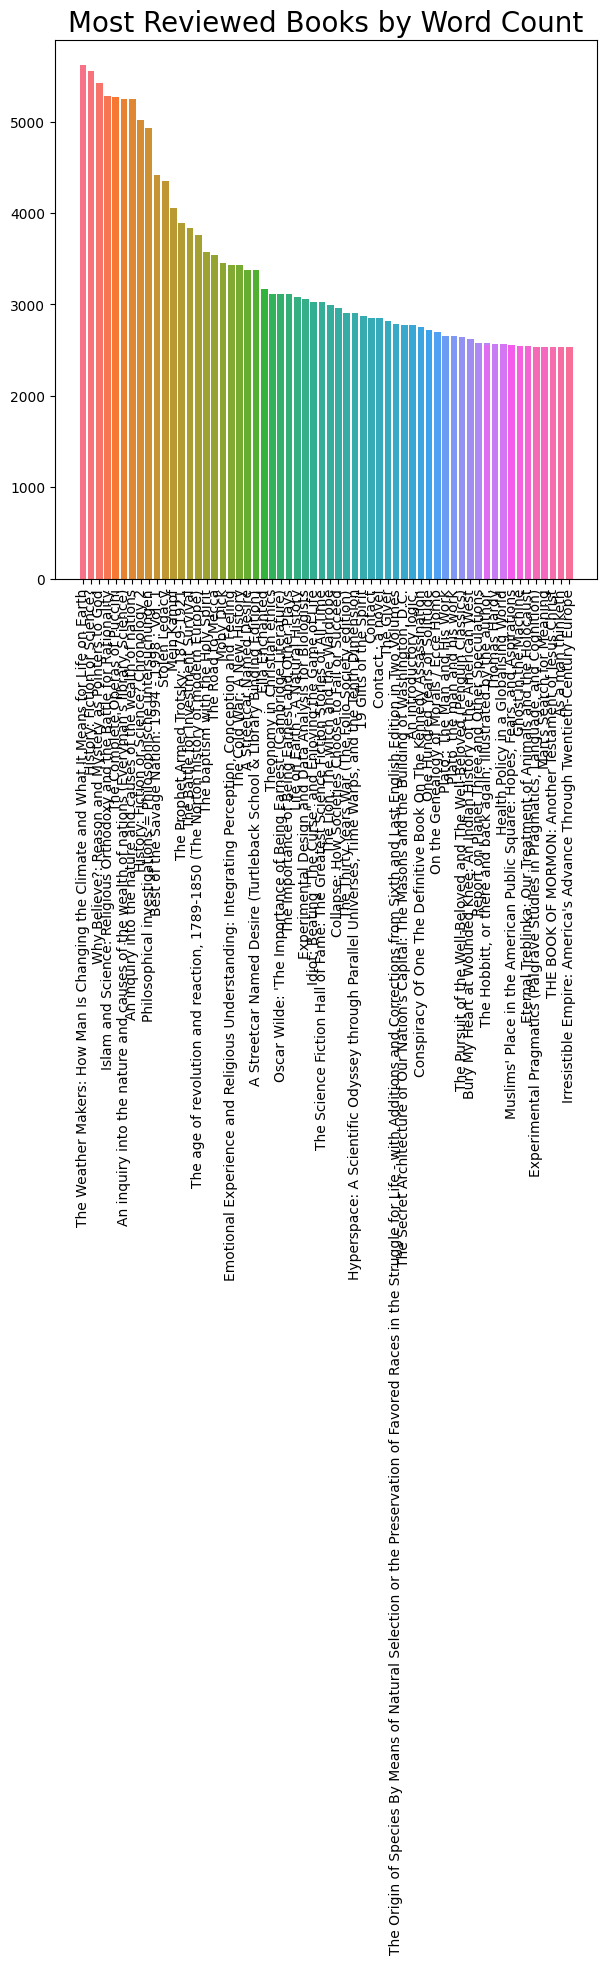

In [195]:
import seaborn as sns  
plt.figure(figsize=(7, 7))
cou = df[df['word_count'] > 2500][['Title', 'word_count']].sort_values(by='word_count', ascending=False)
colors = sns.color_palette('husl', n_colors=len(cou))
bars = plt.bar(cou['Title'], cou['word_count'], color=colors)
plt.title('Most Reviewed Books by Word Count', fontsize=20)
plt.xticks(rotation=90)
plt.show()

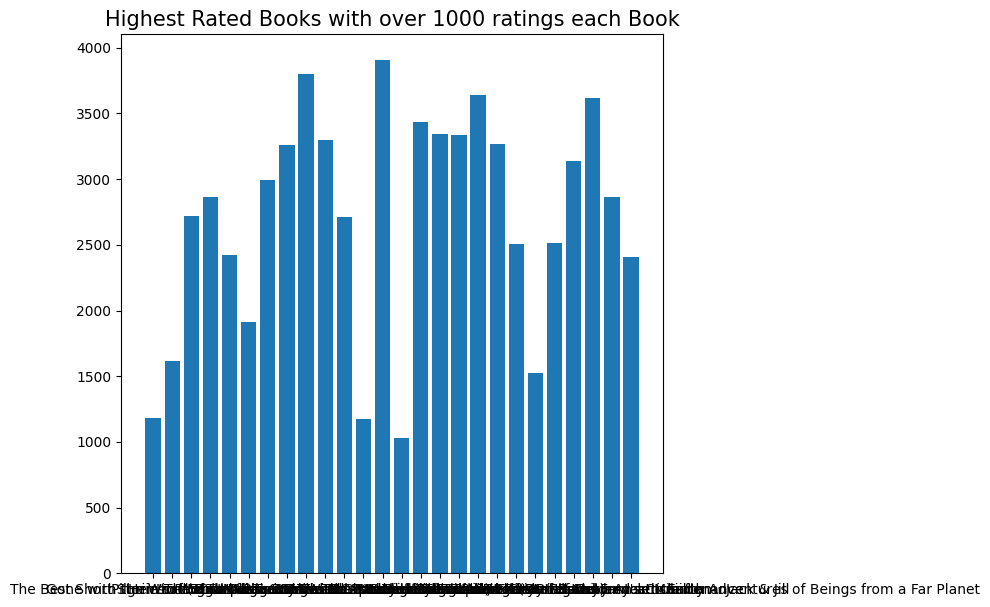

In [196]:
plt.figure(figsize = (7, 7))
rating_counts = df[df['ratingsCount'] > 1000][['Title','ratingsCount']].drop_duplicates()
plt.bar(rating_counts['Title'],rating_counts['ratingsCount'])
plt.title('Highest Rated Books with over 1000 ratings each Book', fontsize = 15)
plt.show()



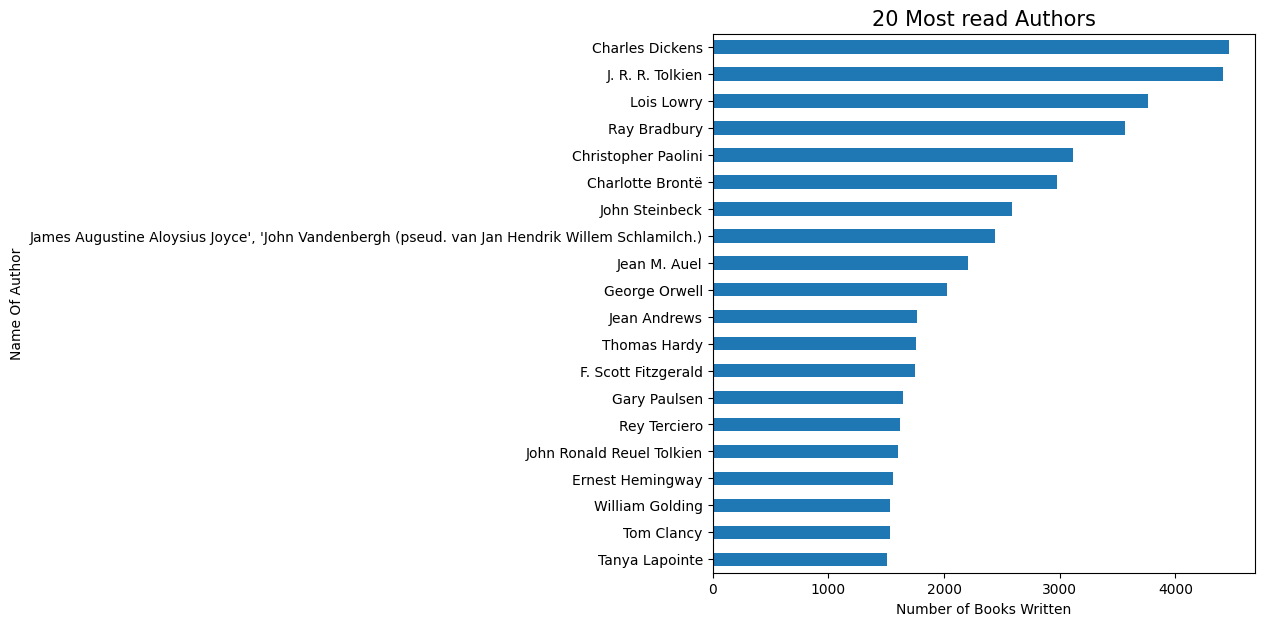

In [197]:
df['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(7,7))
plt.title('20 Most read Authors', fontsize = 15)
plt.ylabel('Name Of Author')
plt.xlabel('Number of Books Written')
plt.show()


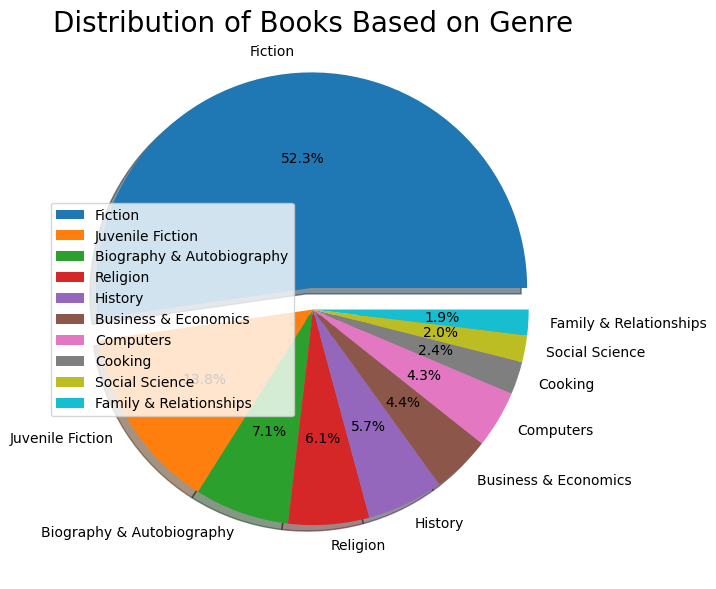

In [198]:
plt.figure(figsize=(7,7))
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(df['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Books Based on Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

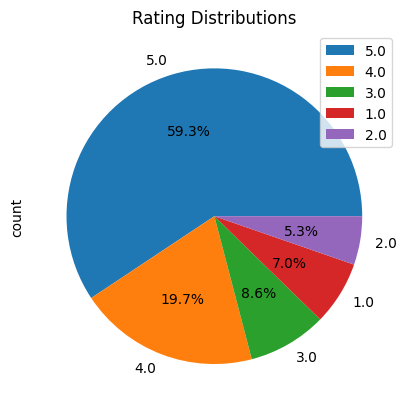

In [199]:
df['review/score'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Rating Distributions")
plt.legend()
plt.show()

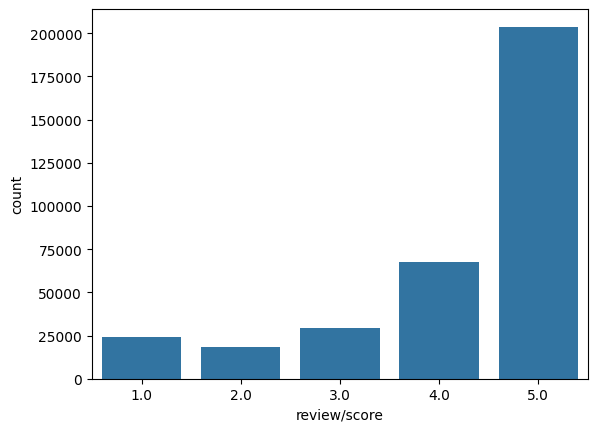

In [200]:
sns.countplot(x=df['review/score'])
plt.show()

In [201]:
df['Cleaned'] = df['review/text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Cleaned'] = df['Cleaned'].str.replace('[^\w\s]','')
df['Cleaned'] = df['Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Cleaned'] = df['Cleaned'].str.replace('\d+', '')
lemmatizer = WordNetLemmatizer()
df['Cleaned'] = [lemmatizer.lemmatize(row) for row in df['Cleaned']]
x = df['Cleaned']       # Independent Variable
y = df['review/score']   # Dependent Variable
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x,y,test_size=0.3, random_state = 2)
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=5000)
tfidf_vect_ngram.fit(x)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)


In [202]:
nb = naive_bayes.MultinomialNB(alpha = 0.6)

model = nb.fit(xtrain_tfidf_ngram, train_y)

pred = model.predict(xvalid_tfidf_ngram)

acc = accuracy_score(valid_y,pred)

print('Accuracy of validation set is :', acc)

Accuracy of validation set is : 0.6184070040572283


In [203]:
score = f1_score(valid_y, pred, average='weighted')
print("Weighted F score is ",score)

Weighted F score is  0.5034623026455036


In [204]:
df2 = df[['Id','review/text']]
df3 = df2.dropna()              #Removing null values
df3.head()

,Id,review/text
0,1882931173,This is only for Julie Strain fans. It's a col...
1,0826414346,I don't care much for Dr. Seuss but after read...
2,0826414346,"If people become the books they read and if ""t..."
3,0826414346,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Philip Nel - Dr. Seuss: American IconThis is b...


In [205]:
#To lower case
df3['Cleaned'] = df3['review/text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Removing punctuation
df3['Cleaned'] = df3['Cleaned'].str.replace('[^\w\s]','')

#Removing Stopwords
df3['Cleaned'] = df3['Cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Removing digits
df3['Cleaned'] = df3['Cleaned'].str.replace('\d+', '')

#Lemmatizing
lemmatizer = WordNetLemmatizer()
df3['Cleaned'] = [lemmatizer.lemmatize(row) for row in df3['Cleaned']]
df3.head()

,Id,review/text,Cleaned
0,1882931173,This is only for Julie Strain fans. It's a col...,julie strain fans. collection photos -- 80 pag...
1,0826414346,I don't care much for Dr. Seuss but after read...,care much dr. seuss reading philip nel's book ...
2,0826414346,"If people become the books they read and if ""t...","people become books read ""the child father man..."
3,0826414346,"Theodore Seuss Geisel (1904-1991), aka &quot;D...","theodore seuss geisel (1904-1991), aka &quot;d..."
4,0826414346,Philip Nel - Dr. Seuss: American IconThis is b...,philip nel - dr. seuss: american iconthis basi...


In [206]:
x1 = df3['Cleaned']


In [207]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=5000)
tfidf_vect_ngram.fit(x1)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(x1)

In [208]:
test_pred = model.predict(xtest_tfidf_ngram)
df3['review/score'] = test_pred
df4 = df3[['review/text','review/score']]
df4.to_csv("predictions.csv")